In [7]:
from source.report.report_utils import preprocess_results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data and hyperparameters
episodes, config = preprocess_results('classic_cartpole')

In [8]:
episodes.keys()

Index(['trial_id', 'run_id', 'episode', 'training_score', 'evaluation_score',
       'epsilon', 'training_actions', 'evaluation_actions',
       'evaluation_observations', 'evaluation_predictions', 'environment',
       'layers', 'learning_rate', 'neurons', 'number_of_weights'],
      dtype='object')

In [9]:
episodes = episodes[['trial_id', 'run_id', 'episode', 'training_score', 'evaluation_score',
                     'epsilon', 'training_actions', 'evaluation_actions',
                     'evaluation_observations', 'evaluation_predictions', 'environment',
                     'layers', 'learning_rate', 'neurons', 'number_of_weights']]


In [10]:
# select trial based on hyperparameters
neurons = 32
learning_rate = 0.001
layers = 4

episodes = episodes[
    (episodes['neurons'] == neurons) & (episodes['learning_rate'] == learning_rate) & (episodes['layers'] == layers)]

episodes_grouped = episodes.groupby(['trial_id', 'run_id', 'layers', 'learning_rate', 'neurons', 'environment']).agg(
    {'evaluation_score': 'mean'}).reset_index()

# find trial with highest evaluation score
trial = \
episodes_grouped[episodes_grouped['evaluation_score'] == episodes_grouped['evaluation_score'].max()]['trial_id'].values[
    0]

episodes = episodes[episodes['trial_id'] == trial].groupby(
    ['episode', 'layers', 'learning_rate', 'neurons', 'environment']).agg({'evaluation_score': 'mean', 'training_score': 'mean'}).reset_index()

C:\Users\mathi\AppData\Local\Temp\ipykernel_15440\2433183447.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='episode', y='evaluation_score', data=group, ax=ax, label=f'{hyperparameters}', ci=None)


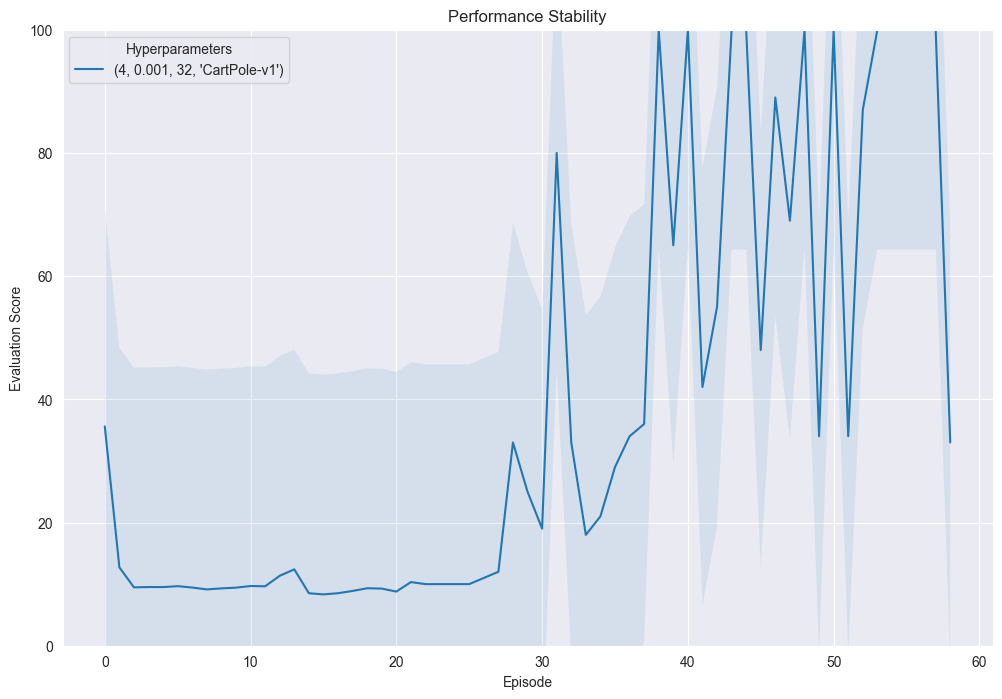

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Group episodes by hyperparameters and episode
grouped_episodes = episodes.groupby(['layers', 'learning_rate', 'neurons', 'environment', 'episode']).agg(
    {'evaluation_score': 'mean'}).reset_index()

# Calculate standard deviation of evaluation scores for each hyperparameter configuration
std_dev = grouped_episodes.groupby(['layers', 'learning_rate', 'neurons', 'environment'])['evaluation_score'].std()

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over each hyperparameter configuration
for i, (hyperparameters, group) in enumerate(
        grouped_episodes.groupby(['layers', 'learning_rate', 'neurons', 'environment'])):
    # Plot the evaluation score over episodes for the current configuration
    sns.lineplot(x='episode', y='evaluation_score', data=group, ax=ax, label=f'{hyperparameters}', ci=None)

    # Calculate the upper and lower bounds of the confidence interval based on the standard deviation
    upper_bound = group['evaluation_score'] + std_dev[hyperparameters]
    lower_bound = group['evaluation_score'] - std_dev[hyperparameters]

    # Plot the confidence interval as a shaded region around the line plot
    ax.fill_between(group['episode'], lower_bound, upper_bound, alpha=0.1)

ax.set_xlabel('Episode')
ax.set_ylabel('Evaluation Score')
ax.set_ylim(0, 100)
ax.set_title('Performance Stability')
ax.legend(title='Hyperparameters')

plt.show()


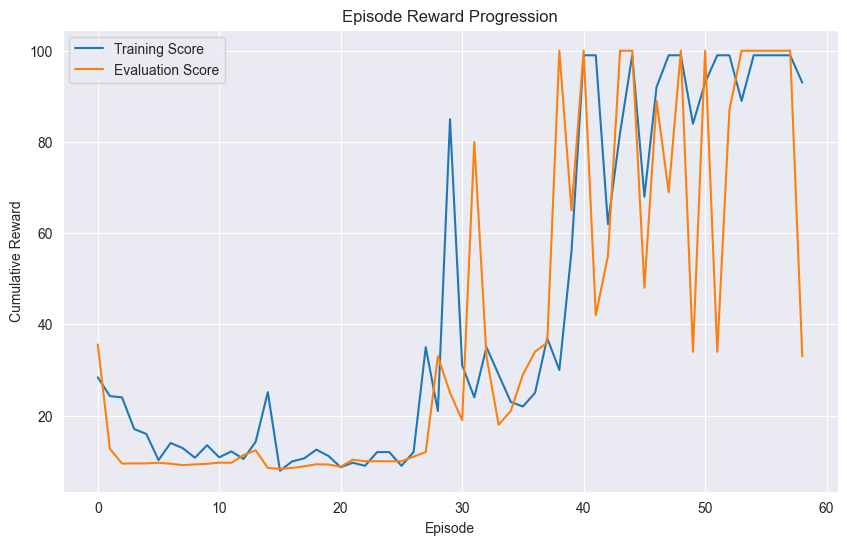

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is stored in a DataFrame called `episodes`
# with columns `episode`, `training_score`, and `evaluation_score`

# Calculate the cumulative sum of rewards per episode
episodes['cumulative_training_score'] = episodes.groupby('episode')['training_score'].cumsum()
episodes['cumulative_evaluation_score'] = episodes.groupby('episode')['evaluation_score'].cumsum()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=episodes, x='episode', y='cumulative_training_score', label='Training Score', ax=ax)
sns.lineplot(data=episodes, x='episode', y='cumulative_evaluation_score', label='Evaluation Score', ax=ax)

ax.set_xlabel('Episode')
ax.set_ylabel('Cumulative Reward')
ax.set_title('Episode Reward Progression')

plt.show()
